# 1. Importing Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/vaibhav/Documents/DMV/WDIData_T.csv')

In [3]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


# 2.1 EDA & Basic Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578806 entries, 0 to 7578805
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 346.9+ MB


#### Observations:
- The dataset is huge with around 757K rows and 5 columns.
- Let's dive into different columns

In [5]:
# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Data Type": df.dtypes,
    "Non-Null Count": df.count(),
    "Null Count": df.isnull().sum()
})

# Display the summary
print(summary_df)

#There are no Null Values but the data is diversified in IndicatorName column.

              Data Type  Non-Null Count  Null Count
CountryName      object         7578806           0
CountryCode      object         7578806           0
IndicatorName    object         7578806           0
IndicatorCode    object         7578806           0
Year              int64         7578806           0
Value           float64         7578806           0


In [6]:
df.nunique()

CountryName          263
CountryCode          263
IndicatorName       1437
IndicatorCode       1437
Year                  61
Value            5526321
dtype: int64

### Observations: 
- There are few column in dataset but the dataset is varied on Indicator Names.
- There are around 1437 unique indicators in whole data.
- We will be working on CO2 emissions numbers over the years.
- We will have to clean the Indicator Name column.
- Let's check what are all indicators we have related to 'CO2 emissions.

In [7]:
df.describe()

,Year,Value
count,7.578806e+06,7.578806e+06
mean,1.996822e+03,1.377970e+12
std,1.539543e+01,7.246749e+13
min,1.960000e+03,-9.824821e+15
25%,1.986000e+03,5.744782e+00
50%,2.000000e+03,4.501830e+01
75%,2.010000e+03,1.785338e+05
max,2.020000e+03,1.590415e+16


In [8]:
# Let's check what all indicators we have for CO2 emissions.

indicators=df['IndicatorName'].unique().tolist()
[indicator for indicator in indicators if 'CO2 emissions' in indicator] 

['CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
 'CO2 emissions from solid fuel consumption (kt)',
 'CO2 emissions from transport (% of total fuel combustion)',
 'CO2 emissions (kg per 2010 US$ of GDP)',
 'CO2 emissions from gaseous fuel consumption (kt)',
 'CO2 emissions (kg per 2017 PPP $ of GDP)',
 'CO2 emissions (kg 

### Obersvations:
- After filtering Indicator Names with CO2 emissions Indicators there are multiple values under it.
- Some of the values shows source of the CO2 emissions like Solid, Liquid, Gaseous in unit KT (kilotonnes)
- Some of the values shows numvers in % of total.
- Let's check other column values.

In [9]:
df['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

### Obersvations:
- The Year column shows data from 1960 to 2020.
- Which means we have data for all countries from 1960 to 2020 for all the indicators.
- Let's check how many countries we have.

In [10]:
df['CountryName'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

### Observations:
- There are many other values too in country column for eg- 'East Asia & Pacific'
- Which are not specific to any specific country.
- We will have to clean the Country column for this.

In [11]:
# Let's update the country Name to short names 

df['CountryName'] = df['CountryName'].replace({
    'United States': 'USA',
    'United Kingdom': 'UK'
})

In [12]:
# Check and analyze the data we have for USA over the years.

# Filter for USA, CO2 emissions indicators, over the years
us_co2_2015 = df[
    (df['CountryName'] == 'USA') &
    (df['IndicatorName'].str.contains('CO2 emissions')) #&
    #(df['Year'] == 2015)
]

# Display the result
us_co2_2015.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36240,USA,USA,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,9.110147e-01
36241,USA,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,2.890696e+06
36242,USA,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.599978e+01
36243,USA,USA,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,1960,2.763521e+01
36244,USA,USA,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,2.181276e+01


In [13]:
us_co2_2015['IndicatorName']

36240                 CO2 emissions (kg per 2010 US$ of GDP)
36241                                     CO2 emissions (kt)
36242                 CO2 emissions (metric tons per capita)
36243      CO2 emissions from electricity and heat produc...
36244      CO2 emissions from gaseous fuel consumption (%...
                                 ...                        
7091906     CO2 emissions from gaseous fuel consumption (kt)
7091907    CO2 emissions from liquid fuel consumption (% ...
7091908      CO2 emissions from liquid fuel consumption (kt)
7091909    CO2 emissions from solid fuel consumption (% o...
7091910       CO2 emissions from solid fuel consumption (kt)
Name: IndicatorName, Length: 842, dtype: object

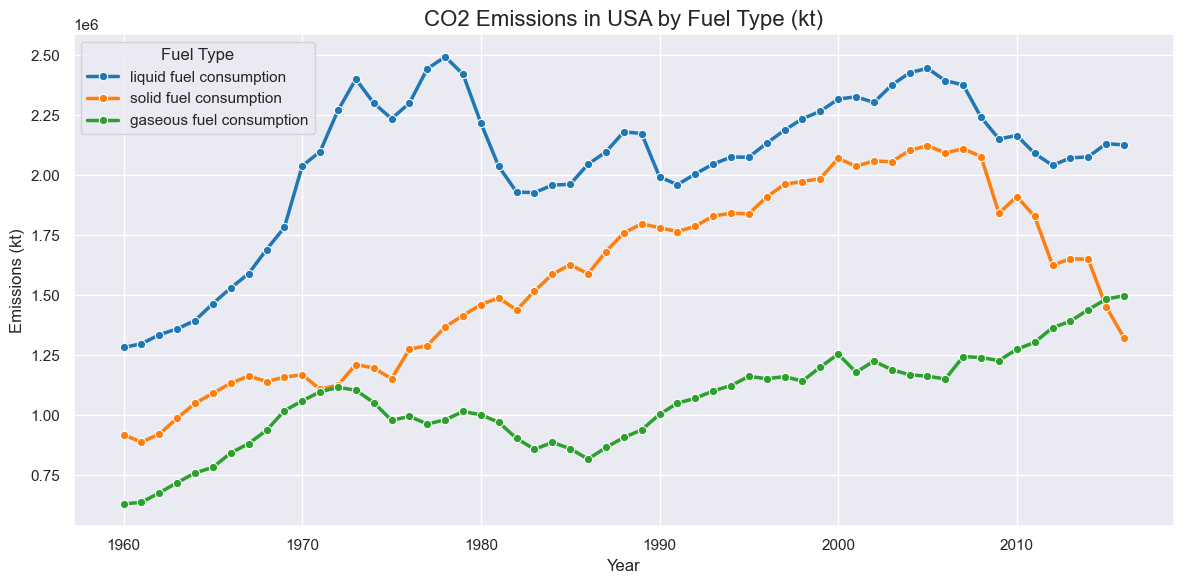

In [14]:
# Let's plot CO2 emissions from Solid, Liquid and Gaseous Fuel over the years for USA.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for pulse effect
sns.set(style="darkgrid")

# Define the indicators of interest
indicators = [
    'CO2 emissions from liquid fuel consumption (kt)',
    'CO2 emissions from solid fuel consumption (kt)',
    'CO2 emissions from gaseous fuel consumption (kt)'
]

# Filter the DataFrame for USA and selected indicators
usa_df = df[(df['CountryName'] == 'USA') & (df['IndicatorName'].isin(indicators))]

# Pivot the data for easier plotting
pivot_df = usa_df.pivot_table(index='Year', columns='IndicatorName', values='Value')

# Plotting
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

for i, indicator in enumerate(indicators):
    sns.lineplot(
        data=pivot_df,
        x=pivot_df.index,
        y=indicator,
        label=indicator.replace('CO2 emissions from ', '').replace(' (kt)', ''),
        marker='o',
        linewidth=2.5,
        color=colors[i]
    )

plt.title('CO2 Emissions in USA by Fuel Type (kt)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Emissions (kt)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

# 2.2 Preparing Data for final plot.

- Countries:
    - As there are all countries, teritories and continent wise data available is dataset the final plot might become very confusing.
    - Let's filter the data by top GDP countries and let's analyze and plot their data over the years.
- Years:
    - As the historical data is from 1960 to 2020, which is also a large scale data.
    - Let's convert and group by the number by decade.
    - So, in the final plot we will be showing decade wise CO2 emission of top GDP countries.


In [15]:
# Define top 10 GDP countries
top_gdp_countries = [
    'USA', 'China', 'Germany', 'Japan', 'India',
    'UK', 'France', 'Brazil', 'Italy', 'Canada'
]

# Filter for CO2 emissions (kt) and top GDP countries
co2_kt_df = df[
    (df['IndicatorName'] == 'CO2 emissions (kt)') &
    (df['CountryName'].isin(top_gdp_countries))
].copy()

# Create Decade column
co2_kt_df['Decade'] = (co2_kt_df['Year'] // 10) * 10

# Group by Country and Decade, sum emissions
decade_totals = co2_kt_df.groupby(['CountryName', 'Decade'])['Value'].sum().reset_index()

# Sort by emissions in descending order
decade_totals_sorted = decade_totals.sort_values(by='Value', ascending=False)

# Display result
decade_totals_sorted.head()

,CountryName,Decade,Value
17,China,2010,6.912613e+07
55,USA,2000,5.651623e+07
16,China,2000,5.475173e+07
54,USA,1990,5.133624e+07
52,USA,1970,4.617369e+07


In [16]:
decade_totals_sorted['Decade'].unique()

array([2010, 2000, 1990, 1970, 1980, 1960])

In [17]:
decade_totals_sorted['CountryName'].unique()

array(['China', 'USA', 'India', 'Japan', 'Germany', 'UK', 'Canada',
       'France', 'Italy', 'Brazil'], dtype=object)

#### observations:
- Now we have data for top 10 GDP countries and we grouped by the values by Decade.

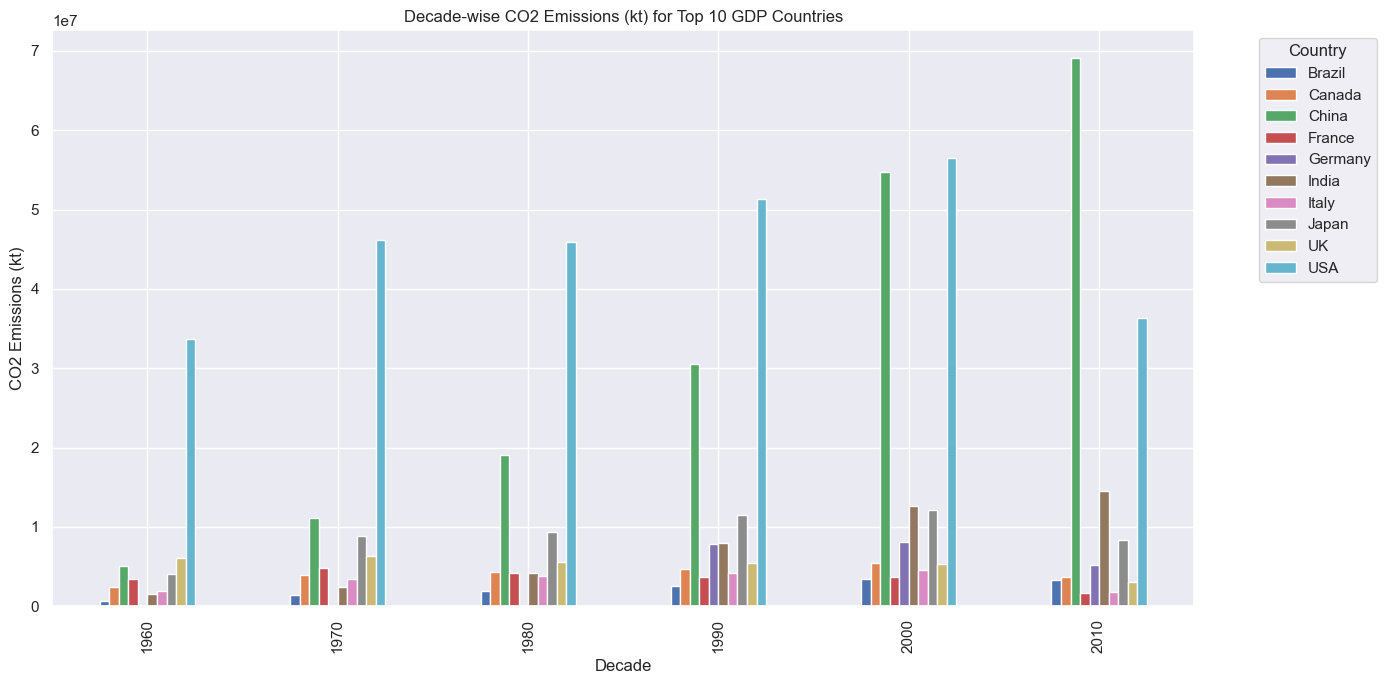

In [18]:
# Pivot for plotting (countries as columns, decades as rows)
import matplotlib.pyplot as plt

pivot_df = decade_totals.pivot(index='Decade', columns='CountryName', values='Value')

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(14, 7))
plt.title('Decade-wise CO2 Emissions (kt) for Top 10 GDP Countries')
plt.ylabel('CO2 Emissions (kt)')
plt.xlabel('Decade')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Observations:
- Obove plot shows the total co2 emission by each country over the decades.
- But, the source of indicators is not clear, we have CO2 emission sources as indicators and also have value for them in KT.

- Indicators
    - The three major sources for CO2 emissions are Solid, Liquid and Gaseous emissions.
    - Let's check those numbers for countries decade wise.

In [19]:
# Define selected indicators
kt_indicators = [
    #'CO2 emissions (kt)',
    'CO2 emissions from liquid fuel consumption (kt)',
    'CO2 emissions from solid fuel consumption (kt)',
    'CO2 emissions from gaseous fuel consumption (kt)'
]

selected_indicators = kt_indicators

# Filter dataset
filtered_df = df[
    df['IndicatorName'].isin(selected_indicators) &
    df['CountryName'].isin(top_gdp_countries)
].copy()

# Create Decade column
filtered_df['Decade'] = (filtered_df['Year'] // 10) * 10

# Aggregate values
kt_df = (
    filtered_df[filtered_df['IndicatorName'].isin(kt_indicators)]
    .groupby(['CountryName', 'Decade', 'IndicatorName'])['Value']
    .sum()
    .reset_index()
)

'''percent_df = (
    filtered_df[filtered_df['IndicatorName'].isin(percent_indicators)]
    .groupby(['CountryName', 'Decade', 'IndicatorName'])['Value']
    .mean()
    .reset_index()
)'''

# Combine both
#final_df = pd.concat([kt_df], ignore_index=True)
final_df = kt_df
# Display result
final_df.head()

,CountryName,Decade,IndicatorName,Value
0,Brazil,1960,CO2 emissions from gaseous fuel consumption (kt),1826.166
1,Brazil,1960,CO2 emissions from liquid fuel consumption (kt),504388.516
2,Brazil,1960,CO2 emissions from solid fuel consumption (kt),68338.212
3,Brazil,1970,CO2 emissions from gaseous fuel consumption (kt),7697.033
4,Brazil,1970,CO2 emissions from liquid fuel consumption (kt),1201422.877


In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    171 non-null    object 
 1   Decade         171 non-null    int64  
 2   IndicatorName  171 non-null    object 
 3   Value          171 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.5+ KB


#### Observations:
- Now we have top 10 GDP countries data of their CO2 emission of 6 decades with major sources of emission.
- Let's check again for USA if we have all the values.

In [21]:
# Example: View data for USA in the 1990s
usa_1990s = final_df[
    (final_df['CountryName'] == 'USA') &
    (final_df['Decade'] == 1990)
]

# Display result
print(usa_1990s)

    CountryName  Decade                                     IndicatorName  \
162         USA    1990  CO2 emissions from gaseous fuel consumption (kt)   
163         USA    1990   CO2 emissions from liquid fuel consumption (kt)   
164         USA    1990    CO2 emissions from solid fuel consumption (kt)   

            Value  
162  1.116922e+07  
163  2.098782e+07  
164  1.868316e+07  


- Continent
    - The only thing missing in out data is Continents.
    - I will be interesting if we add continents to the countries.
    - We will be able to see the numbers by continent level too.

In [22]:
# Define continent mapping
continent_map = {
    'USA': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'UK': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'China': 'Asia',
    'Japan': 'Asia',
    'India': 'Asia'
}

# Add Continent column to final_df
final_df['Continent'] = final_df['CountryName'].map(continent_map)

# Display result
final_df.head()

,CountryName,Decade,IndicatorName,Value,Continent
0,Brazil,1960,CO2 emissions from gaseous fuel consumption (kt),1826.166,South America
1,Brazil,1960,CO2 emissions from liquid fuel consumption (kt),504388.516,South America
2,Brazil,1960,CO2 emissions from solid fuel consumption (kt),68338.212,South America
3,Brazil,1970,CO2 emissions from gaseous fuel consumption (kt),7697.033,South America
4,Brazil,1970,CO2 emissions from liquid fuel consumption (kt),1201422.877,South America


In [23]:
final_df.nunique()

CountryName       10
Decade             6
IndicatorName      3
Value            171
Continent          4
dtype: int64

#### Observations:
- Now we have the final dataset to plot our graph is ready.
- Dataset contains all the required values.
    - Top 10 GDP countries.
    - Continents where the countries belogs.
    - Decade wise totals
    - Source of CO2 emission: Solid, Liquid, Gaseous.
    - Total value on CO2 emissions.

# Final Plot: Animated Sankey Diagram 
### Showing CO2 emissions data of top 10 GDP countries with sources of CO2 emission

In [24]:
pip install plotly pandas

Note: you may need to restart the kernel to use updated packages.


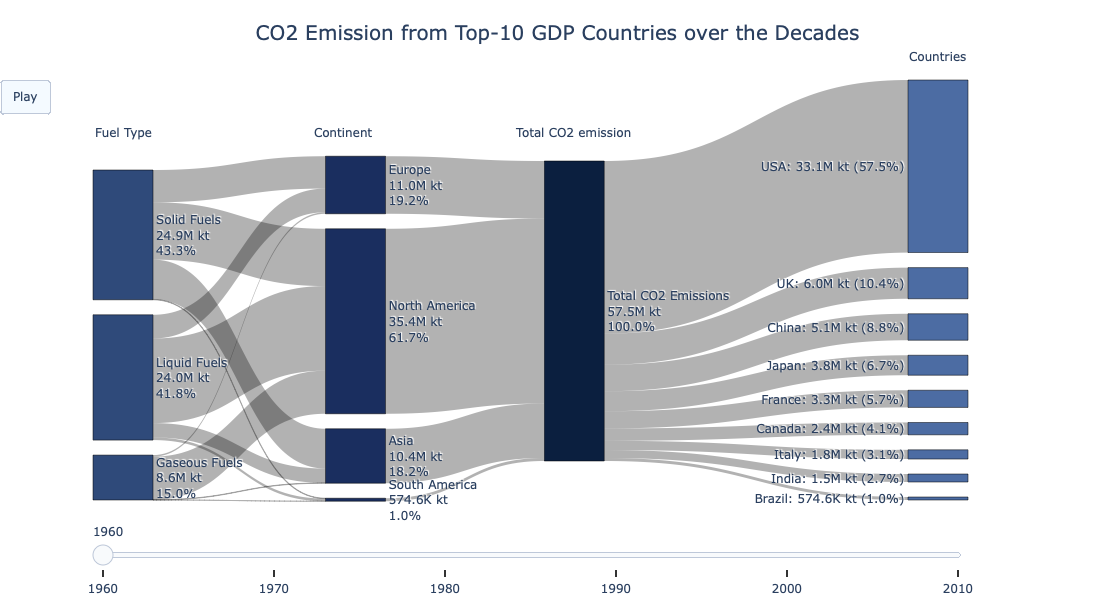

In [26]:
# Importing necessary libraries
import plotly.graph_objects as go

# Maping indicator names to simplified fuel types
fuel_map = {
    'CO2 emissions from gaseous fuel consumption (kt)': 'Gaseous Fuels',
    'CO2 emissions from liquid fuel consumption (kt)': 'Liquid Fuels',
    'CO2 emissions from solid fuel consumption (kt)': 'Solid Fuels'
}

# Filtering and transform the dataset
fuel_df = final_df[final_df['IndicatorName'].isin(fuel_map.keys())].copy()
fuel_df['FuelType'] = fuel_df['IndicatorName'].map(fuel_map)

# Utility function to format large numbers, showing values in Million KT 
def format_value(val):
    if val >= 1_000_000:
        return f"{val / 1_000_000:.1f}M"
    elif val >= 1_000:
        return f"{val / 1_000:.1f}K"
    else:
        return f"{val:.0f}"

# Define colors for node categories
colors = {
    'Fuel': '#2F4A7A',
    'Continent': '#1A2E5F',
    'Total': '#0B1F3F',
    'Country': '#4C6CA3'
}

# Creating animated frames for each decade
frames = []
for decade in sorted(fuel_df['Decade'].unique()):
    # Filtering data for the current decade
    df_decade = fuel_df[fuel_df['Decade'] == decade]
    total_emissions = df_decade['Value'].sum()

    # Preparing node categories
    sorted_countries = df_decade.groupby('CountryName')['Value'].sum().sort_values(ascending=False).index.tolist()
    fuel_types = list(fuel_map.values())
    continents = sorted(df_decade['Continent'].unique().tolist())
    total_node = ['Total CO2 Emissions']
    nodes = fuel_types + continents + total_node + sorted_countries
    node_indices = {name: i for i, name in enumerate(nodes)}

    # Seting node positions (x and y coordinates)
    x_positions = {}
    y_positions = {}

    # 1. Fuel nodes (left)
    for i, name in enumerate(fuel_types):
        x_positions[name] = 0.0
        y_positions[name] = i / len(fuel_types)

    # 2. Continent nodes (middle-left)
    for i, name in enumerate(continents):
        x_positions[name] = 0.3
        y_positions[name] = i / len(continents)

    # 3. Total node (middle-right)
    x_positions['Total CO2 Emissions'] = 0.55
    y_positions['Total CO2 Emissions'] = 0.55

    # 4. Country nodes (right)
    for i, name in enumerate(sorted_countries):
        x_positions[name] = 0.9
        y_positions[name] = i / len(sorted_countries)

    # Initializing Sankey components
    links = []
    node_labels = ["" for _ in nodes]
    node_values = [0 for _ in nodes]
    node_x = [0.0 for _ in nodes]
    node_y = [0.0 for _ in nodes]
    node_customdata = ["" for _ in nodes]

    # Fuel -> Continent links
    ft_continent_raw = df_decade.groupby(['FuelType', 'Continent'])['Value'].sum()
    ft_continent = ft_continent_raw / ft_continent_raw.sum() * total_emissions
    ft_continent = ft_continent.reset_index()

    # Store breakdowns for hover tooltips
    continent_breakdown = {c: {} for c in continents}
    continent_totals = ft_continent.groupby('Continent')['Value'].sum()

    # 1. Adding links from fuel types to continents
    for _, row in ft_continent.iterrows():
        source = node_indices[row['FuelType']]
        target = node_indices[row['Continent']]
        value = row['Value']
        links.append(dict(source=source, target=target, value=value))
        node_values[source] += value
        node_values[target] += value / 2  # Half value to avoid double-counting
        continent_breakdown[row['Continent']][row['FuelType']] = value

    # 2. Adding links from continents to total node
    for continent, value in continent_totals.items():
        source = node_indices[continent]
        target = node_indices['Total CO2 Emissions']
        links.append(dict(source=source, target=target, value=value))
        node_values[source] += value / 2
        node_values[target] += value

    # 3. Adding links from total node to countries
    country_raw = df_decade.groupby('CountryName')['Value'].sum()
    country_scaled = country_raw / country_raw.sum() * total_emissions
    for country, value in country_scaled.items():
        source = node_indices['Total CO2 Emissions']
        target = node_indices[country]
        links.append(dict(source=source, target=target, value=value))
        node_values[target] += value

    # Assigning labels and hover tooltips
    for name, idx in node_indices.items():
        percent = (node_values[idx] / total_emissions) * 100 if total_emissions else 0
        if name in sorted_countries:
            # 1. Country label: one-line format
            node_labels[idx] = f"{name}: {format_value(node_values[idx])} kt ({percent:.1f}%)"
        else:
            # 2. Other nodes: multi-line format
            node_labels[idx] = f"{name}<br>{format_value(node_values[idx])} kt<br>{percent:.1f}%"

        node_x[idx] = 1.0 if name in sorted_countries else x_positions[name]
        node_y[idx] = y_positions[name]

        # Tooltip breakdown for continents
        breakdown = ""
        if name in continent_breakdown:
            for k, v in continent_breakdown[name].items():
                breakdown += f"{k}: {format_value(v)} kt<br>"
        node_customdata[idx] = breakdown

    # Assigning node colors
    node_colors = []
    for name in nodes:
        if name in fuel_types:
            node_colors.append(colors['Fuel'])
        elif name in continents:
            node_colors.append(colors['Continent'])
        elif name == 'Total CO2 Emissions':
            node_colors.append(colors['Total'])
        else:
            node_colors.append(colors['Country'])

    # Creating frame for current decade
    frame = go.Frame(
        data=[go.Sankey(
            arrangement="snap",
            node=dict(
                pad=15,
                thickness=60,
                line=dict(color="black", width=0.5),
                label=node_labels,
                color=node_colors,
                x=node_x,
                y=node_y,
                customdata=node_customdata,
                hovertemplate="%{label}<br>%{customdata}<extra></extra>"
            ),
            link=dict(
                source=[l['source'] for l in links],
                target=[l['target'] for l in links],
                value=[l['value'] for l in links],
                color='rgba(0,0,0,0.3)'
            )
        )],
        name=str(decade)
    )
    frames.append(frame)

# Building and display the final animated Sankey diagram
fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        title=dict(
            text="CO2 Emission from Top-10 GDP Countries over the Decades",
            x=0.5,
            xanchor="center",
            font=dict(size=20)
        ),
        font_size=12,
        width=1100,
        height=600,
        margin=dict(l=0, r=150, t=80, b=100),
        updatemenus=[dict(
            
            type="buttons",
            showactive=True,
            buttons=[dict(label="Play", method="animate", args=[None, {
                "frame": {"duration": 2000, "redraw": True},
                "fromcurrent": True, "transition": {"duration": 100}
            }])]
        )],
        sliders=[dict(
            steps=[dict(method='animate',
                        args=[[f.name], {"frame": {"duration": 2000, "redraw": True}, "mode": "immediate"}],
                        label=f.name) for f in frames],
            transition={"duration": 100},
            x=0, xanchor="left", y=00, yanchor="top"
        )],
        annotations=[
            dict(text="Fuel Type", x=0.0, y=0.9, xref="paper", yref="paper", showarrow=False),
            dict(text="Continent", x=0.25, y=0.9, xref="paper", yref="paper", showarrow=False),
            dict(text="Total CO2 emission", x=0.55, y=0.9, xref="paper", yref="paper", showarrow=False),
            dict(text="Countries", x=1, y=1.08, xref="paper", yref="paper", showarrow=False)
        ]
        
    ),
    frames=frames
)

fig.show()

### Final Observations:

1. Decade 1960
   -   Solid fuels dominate (43.3%), liquid fuels follow.
   -   North America lead emissions. followed by Europe and Asia
   -   Total emission is at 57.5M KT
   -   USA is the top emitter by far with (57%) by UK.
2. Decade 1970
   -   Liquid fuels take over not at (50%).
   -   Asia is emerging with (25%).
   -   China and Japan begin rising. UK goes down.
3. Decade 1980
   -   Solid and liquid fuels nearly equal.
   -   Asia catches up to Europe now at 31%.
   -   total emission near to 100M KT
   -   China’s share grows currently at (20%), India appears.
4. Decade 1990
   -   Solid fuels peak, gaseous fuels grow.
   -   Asia reaching closer to North America.
   -   Total emission rises alot 125M kt
   -   China and India rise fast, USA drops in share.
5. Decade 2000
   -    Solid fuels dominate with 50%, Liquid fuel at 34%.
   -    Asia becomes top emitting continent for the first time.
   -    total emission crossed 150M kt level.
   -    China nearly matches USA, India climbs to number 3.
6. Decade 2010
   -    Solid fuels remain strong.  
   -    Asia contributes over 60% of global emissions.  
   -    China overtakes USA as top emitter.
   -    Total emission decreased for the first time now at 137M Kt.

## Conclusion
- Emissions shift from West to East.
- Solidfuels stay dominant, Liquid fuels rise then fall.
- China and India reshape the global emission landscape.
- Total emission rised from 57M kt to 137M kt over 6 decades.